In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `~/unsupervised_aav2`


In [2]:
using JLD2, BSON, Flux, BiophysViabilityModel, PyPlot, BioSeqInt

In [3]:
const PhageTree = BiophysViabilityModel

BiophysViabilityModel

In [4]:
include("../analysis/utils.jl")

binomial_threshold (generic function with 1 method)

# Data
------------------------
the thresholds have been decided judging by the eye, just to understand the right size of the minibatch for optimization

In [5]:
sequences_experiemnt1, counts_experiment1, labels_experiment1 = 
    load_data_cnn("../my_data/data_experiment1.jld2", -1.0, "experiment1")

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; … ;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0], [1439 349; 2829 3326; … ; 2053 6849; 4249 409], Float32[1.0 0.0 … 0.0 1.0; 0.0 1.0 … 1.0 0.0])

In [6]:
data_experiment1 = load_data_phagetree("../my_data/data_experiment1.jld2", "experiment1");

In [7]:
mb_sizes = [32, 64, 128, 256, 512]

5-element Vector{Int64}:
  32
  64
 128
 256
 512

# CNN

### experiment 1

In [8]:
function load_models(path)
    file = BSON.load(path)
    return file[:models], file[:histories]
end

load_models (generic function with 1 method)

In [9]:
models_cnn, histories_cnn = load_models("../cnn_models/finetune_experiment1.bson");

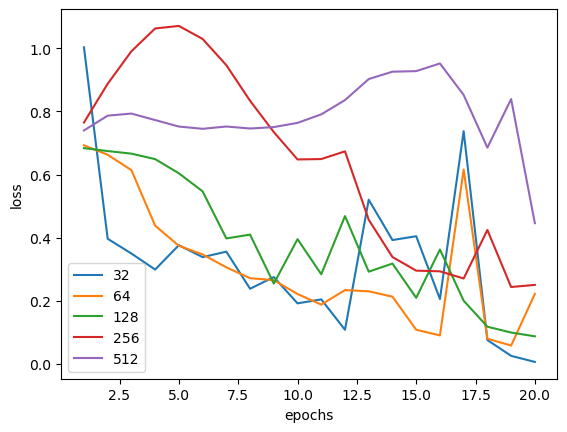

In [10]:
collect(plot(get(h, :training_loss)...) for h in histories_cnn)
legend(mb_sizes)
xlabel("epochs")
ylabel("loss");

### experiment 2

In [11]:
models_cnn2, histories_cnn2 = load_models("../cnn_models/finetune_experiment2_bis.bson");

In [12]:
mb_sizes = [512, 1024, 2048]

3-element Vector{Int64}:
  512
 1024
 2048

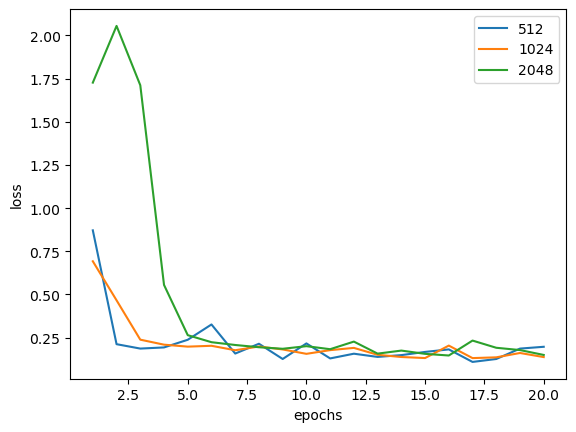

In [13]:
collect(plot(get(h, :training_loss)...) for h in histories_cnn2)
legend(mb_sizes)
xlabel("epochs")
ylabel("loss");

# PhageTree

In [14]:
models_pt, histories_pt = load_models("../phagetree_models/finetune_experiment1.bson");

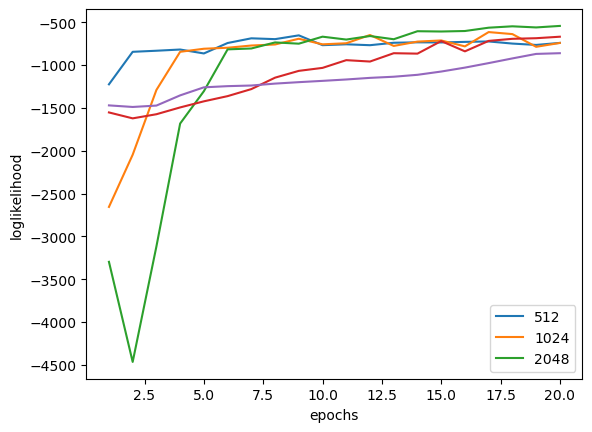

In [15]:
collect(plot(get(h, :loglikelihood)...) for h in histories_pt)
legend(mb_sizes)
xlabel("epochs")
ylabel("loglikelihood");

In [16]:
models_pt2, histories_pt2 = load_models("../phagetree_models/finetune_experiment2.bson");

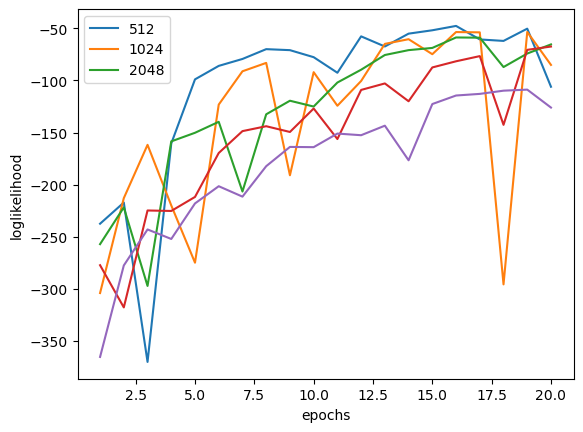

In [17]:
collect(plot(get(h, :loglikelihood)...) for h in histories_pt2)
legend(mb_sizes)
xlabel("epochs")
ylabel("loglikelihood");